In [ ]:
#import required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns


In [ ]:
#load the data set
df = pd.read_csv("stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [ ]:
#find the shape of the data
df.shape

(19586, 8)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
#check the null value
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19586 non-null  object 
 1   Open     19586 non-null  float64
 2   High     19586 non-null  float64
 3   Low      19586 non-null  float64
 4   Close    19586 non-null  float64
 5   Volume   19586 non-null  int64  
 6   OpenInt  19586 non-null  int64  
 7   Stock    19586 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
#find the statistics of the data
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


In [ ]:
# we found the for the column"Close", there is a large difference in mean and median. This implies there are some outliers in the data set


In [ ]:
df.groupby('Stock').count()

,Date,Open,High,Low,Close,Volume,OpenInt
Stock,,,,,,,
AAPL,8364,8364,8364,8364,8364,8364,8364
FB,1381,1381,1381,1381,1381,1381,1381
MSFT,7983,7983,7983,7983,7983,7983,7983
TSLA,1858,1858,1858,1858,1858,1858,1858


In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume,OpenInt,Stock
Date,,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [ ]:
df['Year'] = df.index.year
df.head()

,Open,High,Low,Close,Volume,OpenInt,Stock,Year
Date,,,,,,,,
1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL,1984
1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL,1984
1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL,1984
1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL,1984
1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL,1984


In [ ]:
df1 = df[df['Year']>=1995]
df1.head()

,Open,High,Low,Close,Volume,OpenInt,Stock,Year
Date,,,,,,,,
1995-01-03,1.2446,1.2446,1.2128,1.2294,28967264,0,AAPL,1995
1995-01-04,1.2361,1.2677,1.2361,1.2614,44253608,0,AAPL,1995
1995-01-05,1.2562,1.2614,1.2407,1.2446,20536941,0,AAPL,1995
1995-01-06,1.3320,1.3807,1.3164,1.3447,300251742,0,AAPL,1995
1995-01-09,1.3320,1.3407,1.3126,1.3190,76438048,0,AAPL,1995


In [ ]:
df2 = df1[['Close']]
df2.head()

,Close
Date,
1995-01-03,1.2294
1995-01-04,1.2614
1995-01-05,1.2446
1995-01-06,1.3447
1995-01-09,1.3190


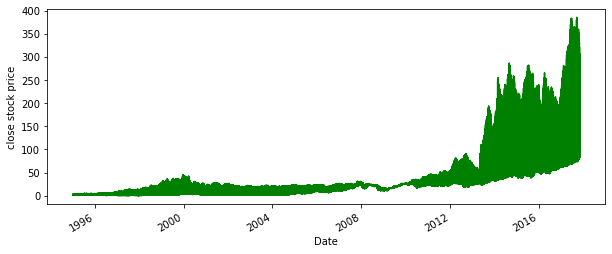

In [ ]:
#plot the graph of the data set
plt.figure(figsize =(10, 4))
#sns.lineplot(x = 'Date', y= 'Close', data = df1)
#plt.plot(df2, color ='green')
df2['Close'].plot(color ='green')
plt.xlabel('Date')
plt.ylabel('close stock price')
plt.show()


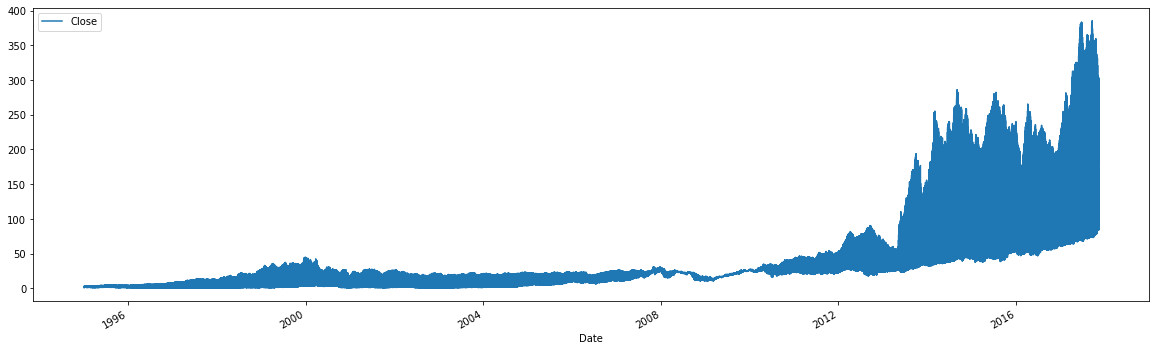

In [ ]:
df2['Close'].plot(figsize =(20,6))
plt.legend(loc ='best')
plt.show(block = False)

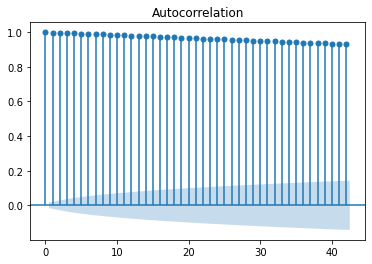

In [ ]:
#check stationarity of the data set
#Draw ACF and PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df2)
plt.show()

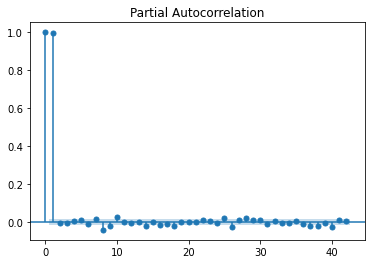

In [ ]:
plot_pacf(df2)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining rolling statistics
    movingAvg = timeseries.rolling(window = 12).mean()
    movingstd = timeseries.rolling(window = 12).std()
    #plot rolling statistics
    plt.plot(timeseries, color ='green')
    #plt.plot(movingAvg, color ='blue')
    #plt.plot(movingstd, color ='red')
    plt.legend(loc ='best')

    #sns.lineplot(x = 'Date', y ='Close', data = timeseries)
    #sns.lineplot(x ='Date', color = 'blue', label ='moving avg')
    #sns.lineplot(movingstd, color ='red', label = 'movingstd')
    plt.show(block = False)

    #perform Decky-fuller test
    dtest = adfuller(timeseries['Close'], autolag ='AIC')
    dfoutput = pd.Series(dtest[0:4], index =['Test statistics', 'p-value', '#lags used', 'No. of obersvation used'])
    for key, value in dtest[4].items():
        dfoutput['critical value (%s)'%key] = value
    print(dfoutput)




No handles with labels found to put in legend.


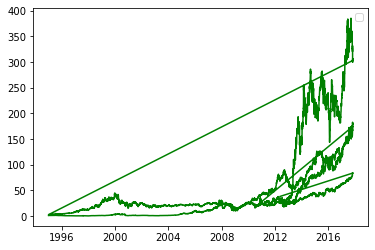

Test statistics               -3.261218
p-value                        0.016704
#lags used                    42.000000
No. of obersvation used    14707.000000
critical value (1%)           -3.430795
critical value (5%)           -2.861737
critical value (10%)          -2.566875
dtype: float64


In [ ]:
test_stationarity(df2)



In [ ]:
df2['Close_first_diff'] = df2['Close'] - df2['Close'].shift(2)
df2['Close'].shift(2)

<ipython-input-220-4ea927d7ba26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close_first_diff'] = df2['Close'] - df2['Close'].shift(2)


Date
1995-01-03         NaN
1995-01-04         NaN
1995-01-05      1.2294
1995-01-06      1.2614
1995-01-09      1.2446
                ...   
2017-11-06    178.9200
2017-11-07    178.9200
2017-11-08    180.1700
2017-11-09    180.2500
2017-11-10    179.5600
Name: Close, Length: 14750, dtype: float64

<ipython-input-221-d8491a6c0054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close_first_diff'].dropna(inplace = True)
No handles with labels found to put in legend.


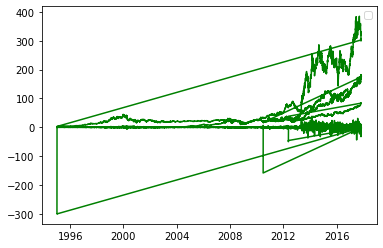

Test statistics               -3.261218
p-value                        0.016704
#lags used                    42.000000
No. of obersvation used    14707.000000
critical value (1%)           -3.430795
critical value (5%)           -2.861737
critical value (10%)          -2.566875
dtype: float64


In [ ]:
df2['Close_first_diff'].dropna(inplace = True)
test_stationarity(df2)


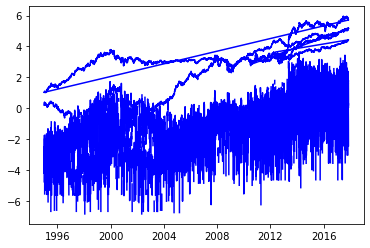

In [ ]:
df3 = np.log(df2)
plt.plot(df3, color ='blue', label ='log scaled data')
plt.show()

In [ ]:
df3['Close_first_diff'] = df3['Close'] - df3['Close'].shift(1)
df2['Close'].shift(1)

Date
1995-01-03         NaN
1995-01-04      1.2294
1995-01-05      1.2614
1995-01-06      1.2446
1995-01-09      1.3447
                ...   
2017-11-06    178.9200
2017-11-07    180.1700
2017-11-08    180.2500
2017-11-09    179.5600
2017-11-10    179.3000
Name: Close, Length: 14750, dtype: float64

No handles with labels found to put in legend.


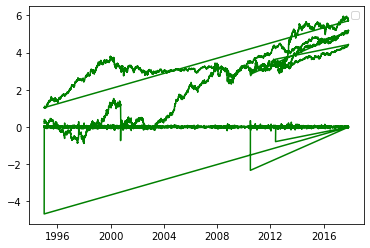

Test statistics               -2.084216
p-value                        0.250909
#lags used                     1.000000
No. of obersvation used    14748.000000
critical value (1%)           -3.430793
critical value (5%)           -2.861736
critical value (10%)          -2.566874
dtype: float64


In [ ]:
df3['Close_first_diff'].dropna(inplace = True)
test_stationarity(df3)

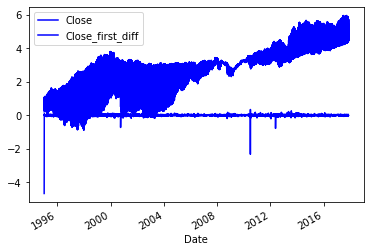

In [ ]:
df3.plot(color ='blue', label ='log scaled data')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA, auto_arima

